# Data-Driven Insights into Realtime Real Estate Price Prediction

The objective of this project is to develop a machine learning model for predicting real estate prices based on various property features such as title, location, carpet area, price, and amenities. Through data preprocessing, feature engineering, and exploratory data analysis (EDA), we aim to clean and transform the dataset to uncover key trends and patterns. The project involves building and evaluating multiple regression models to predict house prices, with the goal of providing valuable insights into the factors influencing property values.

# **Loading the Data**

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/house_prices.csv")
df.head()

,Index,Title,Amount(in rupees),Price (in rupees),location,Carpet Area,Super Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Dimensions
0,0,1 BHK,42 Lac,6000.0,thane,500 sqft,NaN,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN
1,1,2 BHK,98 Lac,13799.0,thane,473 sqft,NaN,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN
2,2,2 BHK,1.40 Cr,17500.0,thane,779 sqft,NaN,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN
3,3,1 BHK,25 Lac,NaN,thane,530 sqft,NaN,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN
4,4,2 BHK,1.60 Cr,18824.0,thane,635 sqft,NaN,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN


In [2]:
df.tail()

,Index,Title,Amount(in rupees),Price (in rupees),location,Carpet Area,Super Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Dimensions
187528,187526,3 BHK,63 Lac,3225.0,zirakpur,NaN,1953 sqft,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,NaN
187529,187527,3 BHK,55 Lac,3274.0,zirakpur,NaN,1680 sqft,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,NaN
187530,187528,3 BHK,76 Lac,4343.0,zirakpur,1250 sqft,NaN,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN
187531,187529,2 BHK,30 Lac,4231.0,zirakpur,NaN,709 sqft,Ready to Move,2 out of 2,Resale,Semi-Furnished,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,NaN
187532,187530,3 BHK,1.18 Cr,6162.0,zirakpur,NaN,1915 sqft,Ready to Move,5 out of 13,Resale,Semi-Furnished,North - East,"Garden/Park, Pool",Affinity Greens,4,4,1 Covered,Freehold,NaN


# **DATA PREPROCESSING**

In [3]:
df.shape

(187533, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187533 entries, 0 to 187532
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187533 non-null  int64  
 1   Title              187533 non-null  object 
 2   Amount(in rupees)  187533 non-null  object 
 3   Price (in rupees)  169868 non-null  float64
 4   location           187533 non-null  object 
 5   Carpet Area        106858 non-null  object 
 6   Super Area         79848 non-null   object 
 7   Status             186918 non-null  object 
 8   Floor              180456 non-null  object 
 9   Transaction        187450 non-null  object 
 10  Furnishing         184636 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77854 non-null   object 
 14  Bathroom           186705 non-null  object 
 15  Balcony            138597 non-null  object 
 16  Ca

In [5]:
df.rename(columns={"Amount(in rupees)" : "Amount", "Price (in rupees)" : "Price"}, inplace=True)
df.columns

Index(['Index', 'Title', 'Amount', 'Price', 'location', 'Carpet Area',
       'Super Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing',
       'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking',
       'Ownership', 'Dimensions'],
      dtype='object')

## **DATA CLEANING**

### **Identify Missing Values**

In [6]:
df.isnull().sum()

,0
Index,0
Title,0
Amount,0
Price,17665
location,0
Carpet Area,80675
Super Area,107685
Status,615
Floor,7077
Transaction,83


### **Handle Missing Values**

In [7]:
# Drop columns with too many missing values
df.drop(columns=['Society', 'Car Parking', 'Dimensions'], inplace=True)

In [8]:
df.columns

Index(['Index', 'Title', 'Amount', 'Price', 'location', 'Carpet Area',
       'Super Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing',
       'overlooking', 'Bathroom', 'Balcony', 'Ownership'],
      dtype='object')

#### **Imputation**

In [9]:
df['Floor'].unique()[:5]

array(['10 out of 11', '3 out of 22', '10 out of 29', '1 out of 3',
       '20 out of 42'], dtype=object)

In [10]:
cols = ['Title','location','Status'] + df.columns[9:].to_list()
print(cols)

['Title', 'location', 'Status', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership']


In [11]:
for col in cols:
    print(f"{col}: \t {list(df[col].unique())}")

Title: 	 ['1 BHK', '2 BHK', '3 BHK', '4 BHK', '5 BHK', '  Studio Apartment', '6 BHK', 'Apartment', '8 BHK', '7 BHK', '> 10 BHK', '9 BHK', '10 BH', 'Builder Floor']
location: 	 ['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad', 'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur', 'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra', 'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum', 'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh', 'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad', 'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati', 'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur', 'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai', 'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore', 'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry', 'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri', 'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy', 'trivan

In [12]:
df['Title'] = df['Title'].replace({'  Studio Apartment': 'Studio Apartment','10 BH': '10 BHK'})

In [13]:
df['location'] = df['location'].str.capitalize()

In [14]:
#   Fill null values in 'Facing', 'Overlooking', 'Ownership', and 'Status' columns with 'Unknown'
cols_to_fill_unknown = ['facing', 'overlooking', 'Ownership', 'Status']
#df[cols_to_fill_unknown].fillna('Unknown', inplace=True)
df[cols_to_fill_unknown] = df[cols_to_fill_unknown].fillna('Unknown')

In [15]:
df['Transaction'].mode()[0]

'Resale'

In [16]:
df['Furnishing'].mode()[0]

'Semi-Furnished'

In [17]:
#   Fill null values in 'Floor', 'Furnishing', 'Bathroom', and 'Balcony' columns with their respective mode
cols_to_fill_mode = ['Floor', 'Transaction', 'Furnishing', 'Bathroom', 'Balcony']
for col in cols_to_fill_mode:
    df[col] = df[col].fillna(df[col].mode()[0])

In [18]:
# Drop rows from the DataFrame where the 'Transaction' column has missing values (NaNs)
df.dropna(subset=['Transaction'], inplace=True)

In [19]:
df.isna().sum()

,0
Index,0
Title,0
Amount,0
Price,17665
location,0
Carpet Area,80675
Super Area,107685
Status,0
Floor,0
Transaction,0


In [20]:
for col in cols:
    print(f"{col}: \t {list(df[col].unique())}")

Title: 	 ['1 BHK', '2 BHK', '3 BHK', '4 BHK', '5 BHK', 'Studio Apartment', '6 BHK', 'Apartment', '8 BHK', '7 BHK', '> 10 BHK', '9 BHK', '10 BHK', 'Builder Floor']
location: 	 ['Thane', 'Navi-mumbai', 'Nagpur', 'Mumbai', 'Ahmedabad', 'Bangalore', 'Chennai', 'Gurgaon', 'Hyderabad', 'Indore', 'Jaipur', 'Kolkata', 'Lucknow', 'New-delhi', 'Noida', 'Pune', 'Agra', 'Ahmadnagar', 'Allahabad', 'Aurangabad', 'Badlapur', 'Belgaum', 'Bhiwadi', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Chandigarh', 'Coimbatore', 'Dehradun', 'Durgapur', 'Ernakulam', 'Faridabad', 'Ghaziabad', 'Goa', 'Greater-noida', 'Guntur', 'Guwahati', 'Gwalior', 'Haridwar', 'Jabalpur', 'Jamshedpur', 'Jodhpur', 'Kalyan', 'Kanpur', 'Kochi', 'Kozhikode', 'Ludhiana', 'Madurai', 'Mangalore', 'Mohali', 'Mysore', 'Nashik', 'Navsari', 'Nellore', 'Palakkad', 'Palghar', 'Panchkula', 'Patna', 'Pondicherry', 'Raipur', 'Rajahmundry', 'Ranchi', 'Satara', 'Shimla', 'Siliguri', 'Solapur', 'Sonipat', 'Surat', 'Thrissur', 'Tirupati', 'Trichy', 'Trivand

In [21]:
# Fill missing Carpet Area values with corresponding Super Area values
df['Carpet Area'] = df['Carpet Area'].fillna(df['Super Area'])

In [22]:
df.tail()

,Index,Title,Amount,Price,location,Carpet Area,Super Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
187528,187526,3 BHK,63 Lac,3225.0,Zirakpur,1953 sqft,1953 sqft,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,3,3,Freehold
187529,187527,3 BHK,55 Lac,3274.0,Zirakpur,1680 sqft,1680 sqft,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3,2,Unknown
187530,187528,3 BHK,76 Lac,4343.0,Zirakpur,1250 sqft,NaN,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",3,2,Freehold
187531,187529,2 BHK,30 Lac,4231.0,Zirakpur,709 sqft,709 sqft,Ready to Move,2 out of 2,Resale,Semi-Furnished,Unknown,Main Road,2,2,Unknown
187532,187530,3 BHK,1.18 Cr,6162.0,Zirakpur,1915 sqft,1915 sqft,Ready to Move,5 out of 13,Resale,Semi-Furnished,North - East,"Garden/Park, Pool",4,4,Freehold


In [23]:
df.drop(columns='Super Area', inplace=True)

In [24]:
null_counts = df.isnull().sum()
null_counts[ null_counts> 0 ]

,0
Price,17665
Carpet Area,827


In [25]:
# Extract non-digits such as units from 'Carpet Area' column
df['Carpet Area'].str.extract(r'(\D+)', expand=False).unique()

array([' sqft', nan, ',', ' sqm', ' sqyrd', ' marla', ' acre', ' ground',
       ' kanal', ' cent', ' bigha', ' biswa', ' aankadam', ' hectare'],
      dtype=object)

In [26]:
df['Carpet Area'] = df['Carpet Area'].str.replace(',', '')      # Remove commas
df['Carpet Area'].str.extract(r'(\D+)', expand=False).unique()

array([' sqft', nan, ' sqm', ' sqyrd', ' marla', ' acre', ' ground',
       ' kanal', ' cent', ' bigha', ' biswa', ' aankadam', ' hectare'],
      dtype=object)

In [27]:
df[df['Carpet Area'].str.contains('bigha', na=False)]

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
162059,162057,2 BHK,85 Lac,4979.0,Greater-noida,1607 bigha,Ready to Move,12 out of 18,Resale,Semi-Furnished,North - East,"Garden/Park, Pool, Main Road",3,1,Freehold


In [28]:
df[df['Carpet Area'].str.contains('biswa', na=False)]

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
171916,171914,4 BHK,Call for Price,NaN,Mohali,1970 biswa2,Ready to Move,Ground out of 13,Resale,Unfurnished,Unknown,Unknown,4,2,Unknown


In [29]:
df[df['Carpet Area'].str.contains('aankadam', na=False)]

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
173413,173411,1 BHK,16 Lac,4.0,Palghar,485 aankadam,Ready to Move,2 out of 3,Resale,Unfurnished,Unknown,Unknown,1,2,Freehold


In [30]:
df[df['Carpet Area'].str.contains('hectare', na=False)]

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
181329,181327,1 BHK,Call for Price,NaN,Vadodara,360 hectare,Ready to Move,3 out of 6,New Property,Unfurnished,Unknown,Unknown,1,2,Freehold


- **1 hectare** = 1,07,639 sqft
- **1 acre** = 43,560 sqft
- **1 kanal** = 5,445 sqft
- **1 ground** = 2,400 sqft
- **1 bigha** = 27,000 sqft (in Greater-Noida, UP)
- **1 biswa** = 1,350 sqft (in Mohali, Punjab)
- **1 aankadam** = 72 sqft (in Palghar, Maharashtra)

The area for values like `hectare`, `acre`, `bigha` results in excessively large values when converted to square feet. These units represent large land areas (often agricultural or commercial) and are unrealistic for residential real estate.

- Since the dataset focuses on residential properties, such large values will be considered outliers and are better to be removed to maintain data consistency and relevance for the analysis.

The rows containing `hectare`, `bigha`, `biswa`, `aankadam`, `acre`, `kanal`, and `ground` as units of measurement will be dropped from the dataset due to their unrealistic size for residential properties. These units typically represent larger land areas, often associated with agricultural or commercial plots, which are not suitable for the scope of this residential property dataset.

In [31]:
# Retain rows where 'Carpet Area' contains only any of the units: sqft, sqm, sqyrd, marla, cent
df = df[df['Carpet Area'].str.contains('sqft|sqm|sqyrd|marla|cent', na=False)]
df['Carpet Area'].str.extract(r'(\D+)', expand=False).unique()

array([' sqft', ' sqm', ' sqyrd', ' marla', ' cent'], dtype=object)

To standardize the 'Carpet Area', the units `sqm`, `sqyrd`, `marla`, and `cent` are to be converted to `sqft` (square feet) for consistency.

In [32]:
# Conversion factors to sqft for retained units
conversion_factors = {
    'sqft': 1,        # 1 sqft = 1 sqft
    'sqm': 10.7639,    # 1 sqm = 10.7639 sqft
    'sqyrd': 9,        # 1 sqyrd = 9 sqft
    'marla': 272.25,   # 1 marla = 272.25 sqft
    'cent': 435.6,     # 1 cent = 435.6 sqft
}

In [33]:
area = '100 sqyrd'      # Example area value with unit

area_value, unit = area.split(maxsplit=1)
conversion_factor = conversion_factors.get(unit.strip(), 1)
float(area_value) * conversion_factor

900.0

This process will be used to standardize all area units to square feet (`sqft`).

In [34]:
# Convert Carpet Area to sqft
def convert_to_sqft(area_str):
    if pd.isnull(area_str):  # Handle NaN values
        return pd.NA
    # Extract numeric part and unit
    area_value, unit = area_str.split(maxsplit=1)
    area_value = float(area_value)
    conversion_factor = conversion_factors.get(unit.strip(), 1)
    if conversion_factor is None: return pd.NA
    return area_value * conversion_factor

df['Carpet Area'] = df['Carpet Area'].apply(convert_to_sqft)

In [35]:
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')
df['Carpet Area'].dtype

dtype('float64')

<Axes: >

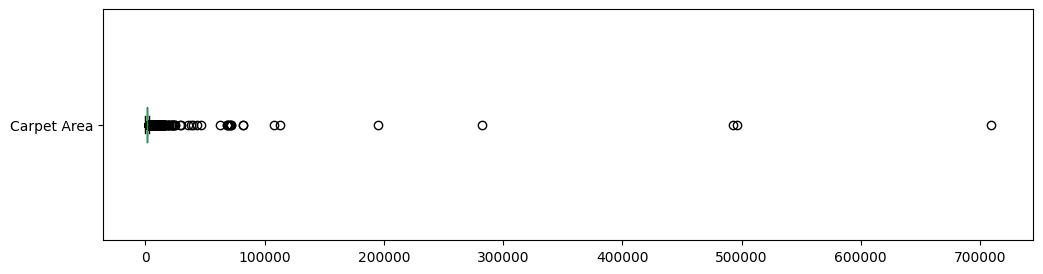

In [36]:
df.boxplot('Carpet Area', vert=False, grid=False, figsize=(12,3))

In [37]:
df['Carpet Area'].mean()

1314.5695755732797

In [38]:
df['Carpet Area'].median()

1180.0

In [39]:
df['Carpet Area'].quantile(0.75)    # 75th percentile

1600.0

In [40]:
# Fill null values in 'Carpet Area' with its median value as it has outliers
df['Carpet Area'] = df['Carpet Area'].fillna(df['Carpet Area'].median())

<Axes: >

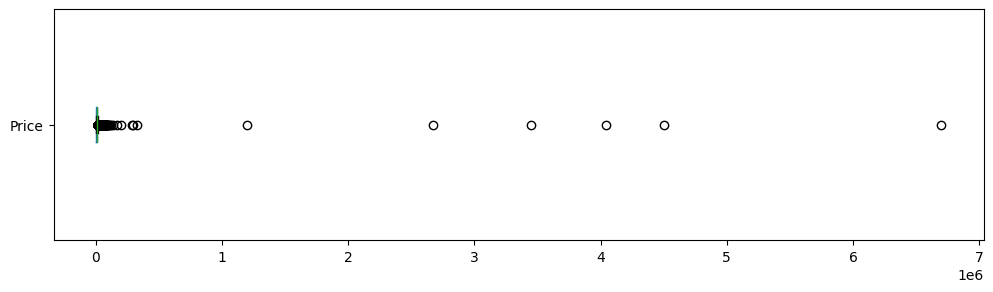

In [41]:
df.boxplot('Price', vert=False, grid=False, figsize=(12,3))

In [42]:
df['Price'].mean()

7557.714649051539

In [43]:
df['Price'].median()

6034.0

In [44]:
df['Price'].quantile(0.75)

9450.75

In [45]:
# Fill missing 'Price' values with the 75th percentile (Q3) to reflect the upper-middle range of the distribution and reduce the impact of outliers
df['Price'] = df['Price'].fillna(df['Price'].quantile(0.75))

In [46]:
# Drop all rows from the DataFrame that contain any missing values (NaNs) in any column
#df.dropna(inplace=True)

In [47]:
df.isna().sum()

,0
Index,0
Title,0
Amount,0
Price,0
location,0
Carpet Area,0
Status,0
Floor,0
Transaction,0
Furnishing,0


In [48]:
df.head()

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,1 BHK,42 Lac,6000.00,Thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,1,2 BHK,98 Lac,13799.00,Thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2,2 BHK,1.40 Cr,17500.00,Thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,3,1 BHK,25 Lac,9450.75,Thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,4,2 BHK,1.60 Cr,18824.00,Thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


In [49]:
# Extract non-digits such as units from 'Amount' column
df['Amount'].str.extract(r'(\D+)', expand=False).unique()

array([' Lac ', '.', 'Call for Price', ' Cr '], dtype=object)

In [50]:
# Convert 'Amount' to numerical format
def convert_amount(amount):
    if 'Call for Price' in amount:
        return None
    factor = 100000 if 'Lac' in amount else 10000000   # 1 Lac = 100000 rupees and 1 Cr = 10000000 rupees
    value = float(amount.split(maxsplit=1)[0])
    return value * factor

df['Amount'] = df['Amount'].apply(convert_amount)

In [51]:
df['Amount'].dtype

dtype('float64')

### **Handle Duplicates**

In [52]:
df.duplicated().sum()

2

In [53]:
df[df.duplicated(keep=False)]

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
12,12,2 BHK,13500000.0,15995.0,Thane,844.0,Ready to Move,8 out of 20,Resale,Semi-Furnished,Unknown,Unknown,2,2,Unknown
13,12,2 BHK,13500000.0,15995.0,Thane,844.0,Ready to Move,8 out of 20,Resale,Semi-Furnished,Unknown,Unknown,2,2,Unknown
22908,22907,2 BHK,6500000.0,5508.0,Bangalore,1180.0,Ready to Move,1 out of 4,Resale,Semi-Furnished,Unknown,Unknown,2,1,Freehold
22909,22907,2 BHK,6500000.0,5508.0,Bangalore,1180.0,Ready to Move,1 out of 4,Resale,Semi-Furnished,Unknown,Unknown,2,1,Freehold


In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.duplicated().sum()

0

In [56]:
df.shape

(186687, 15)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186687 entries, 0 to 187532
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Index        186687 non-null  int64  
 1   Title        186687 non-null  object 
 2   Amount       177743 non-null  float64
 3   Price        186687 non-null  float64
 4   location     186687 non-null  object 
 5   Carpet Area  186687 non-null  float64
 6   Status       186687 non-null  object 
 7   Floor        186687 non-null  object 
 8   Transaction  186687 non-null  object 
 9   Furnishing   186687 non-null  object 
 10  facing       186687 non-null  object 
 11  overlooking  186687 non-null  object 
 12  Bathroom     186687 non-null  object 
 13  Balcony      186687 non-null  object 
 14  Ownership    186687 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 22.8+ MB


### **Identify Outliers**

<Axes: >

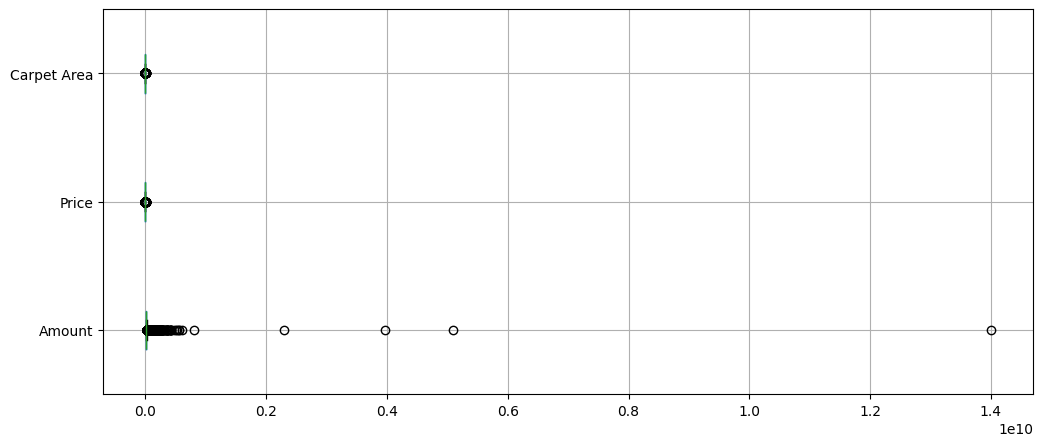

In [58]:
df.boxplot(['Amount', 'Price', 'Carpet Area'], vert=False, figsize=(12,5))

### **Remove Outliers**

In [59]:
numerical_cols = ['Amount', 'Price', 'Carpet Area']

for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= Q1-1.5 *IQR) & (df[column] <= Q3+1.5*IQR)]

In [60]:
df.shape

(158047, 15)

<Axes: >

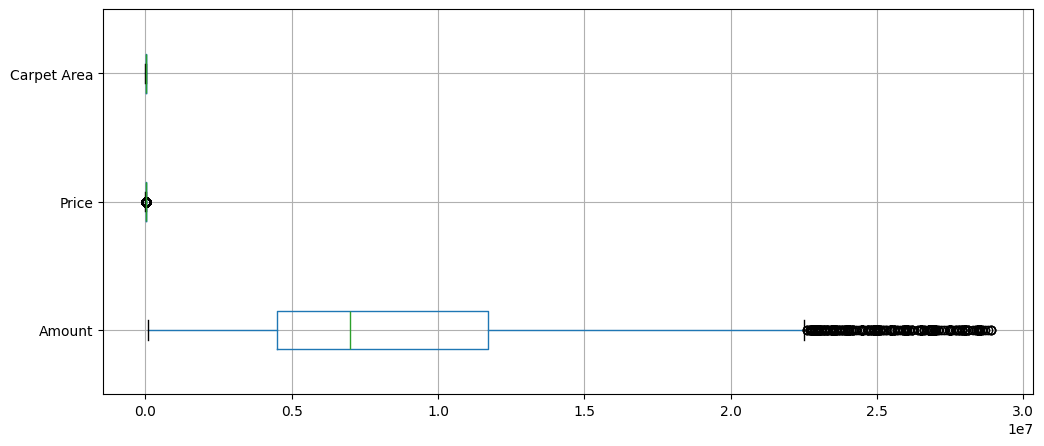

In [61]:
df.boxplot(numerical_cols, vert=False, figsize=(12,5))

In [62]:
df[numerical_cols].describe().astype(int)

,Amount,Price,Carpet Area
count,158047,158047,158047
mean,8813327,6556,1176
std,5991416,2919,434
min,100000,0,1
25%,4500000,4222,864
50%,7000000,5846,1149
75%,11700000,8333,1494
max,28900000,15263,2430


### **Assessing Skewness**

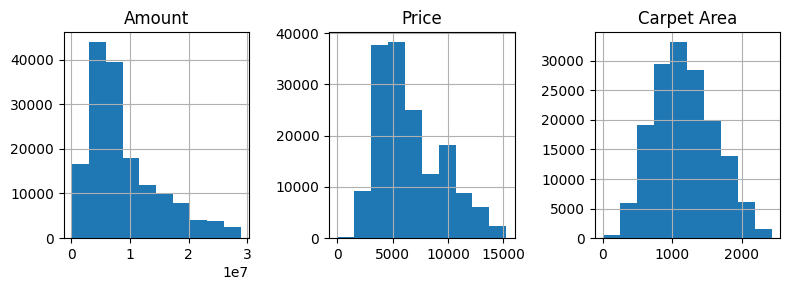

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(numerical_cols, layout=(1,3), figsize=(8,3))
plt.tight_layout()
plt.show()

In [64]:
list(enumerate(numerical_cols))

[(0, 'Amount'), (1, 'Price'), (2, 'Carpet Area')]

In [65]:
skewness = df[numerical_cols].skew()
skewness

,0
Amount,1.229806
Price,0.803886
Carpet Area,0.237886


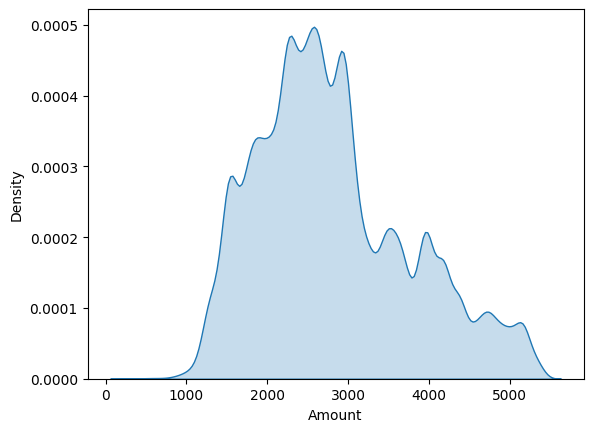

In [66]:
# Square-root transformation
amt_sqrt = df['Amount']**0.5
sns.kdeplot(x=amt_sqrt, fill=True)
plt.show()

In [67]:
df.to_csv('house_price_cleaned.csv', index=False)

# **EDA**

In [68]:
df.head()

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,1 BHK,4200000.0,6000.00,Thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,1,2 BHK,9800000.0,13799.00,Thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
3,3,1 BHK,2500000.0,9450.75,Thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
5,5,1 BHK,4500000.0,6618.00,Thane,680.0,Ready to Move,2 out of 7,Resale,Unfurnished,East,"Garden/Park, Main Road",1,1,Co-operative Society
6,6,1 BHK,1650000.0,2538.00,Thane,550.0,Ready to Move,4 out of 5,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

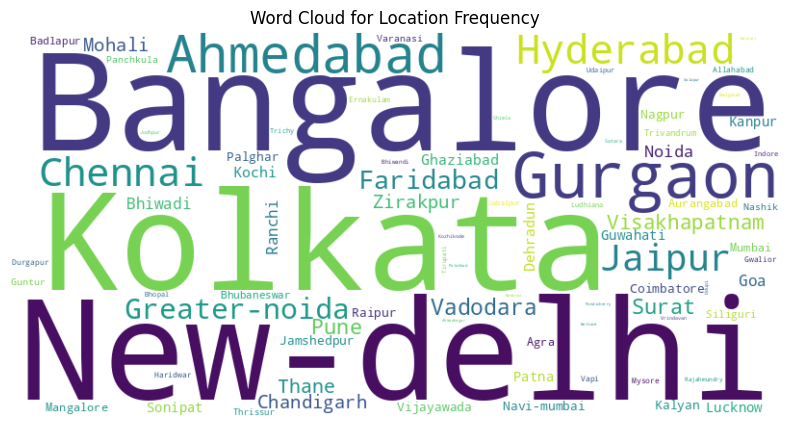

In [70]:
from wordcloud import WordCloud

# Generate the frequency dictionary from value_counts
location_frequencies = df['location'].value_counts().to_dict()
# Create the Word Cloud
location_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(location_frequencies)
# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(location_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Location Frequency')
plt.axis('off')
plt.show()

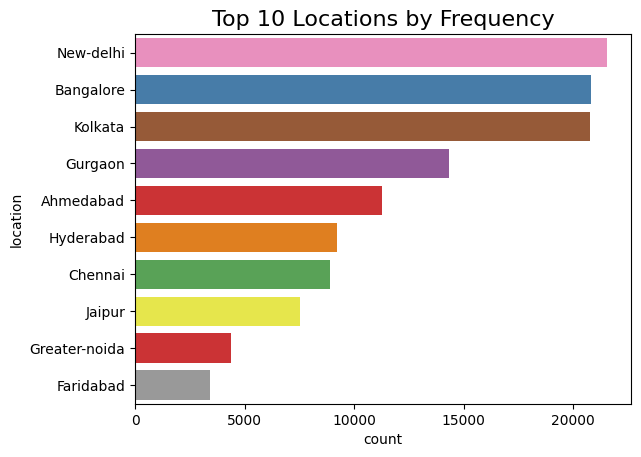

In [71]:
# Top 10 locations
top_10_locations = df['location'].value_counts().head(10).index
sns.countplot(data=df[df['location'].isin(top_10_locations)], y='location', order=top_10_locations, hue='location', palette="Set1")
plt.title('Top 10 Locations by Frequency', fontsize=16)
plt.show()

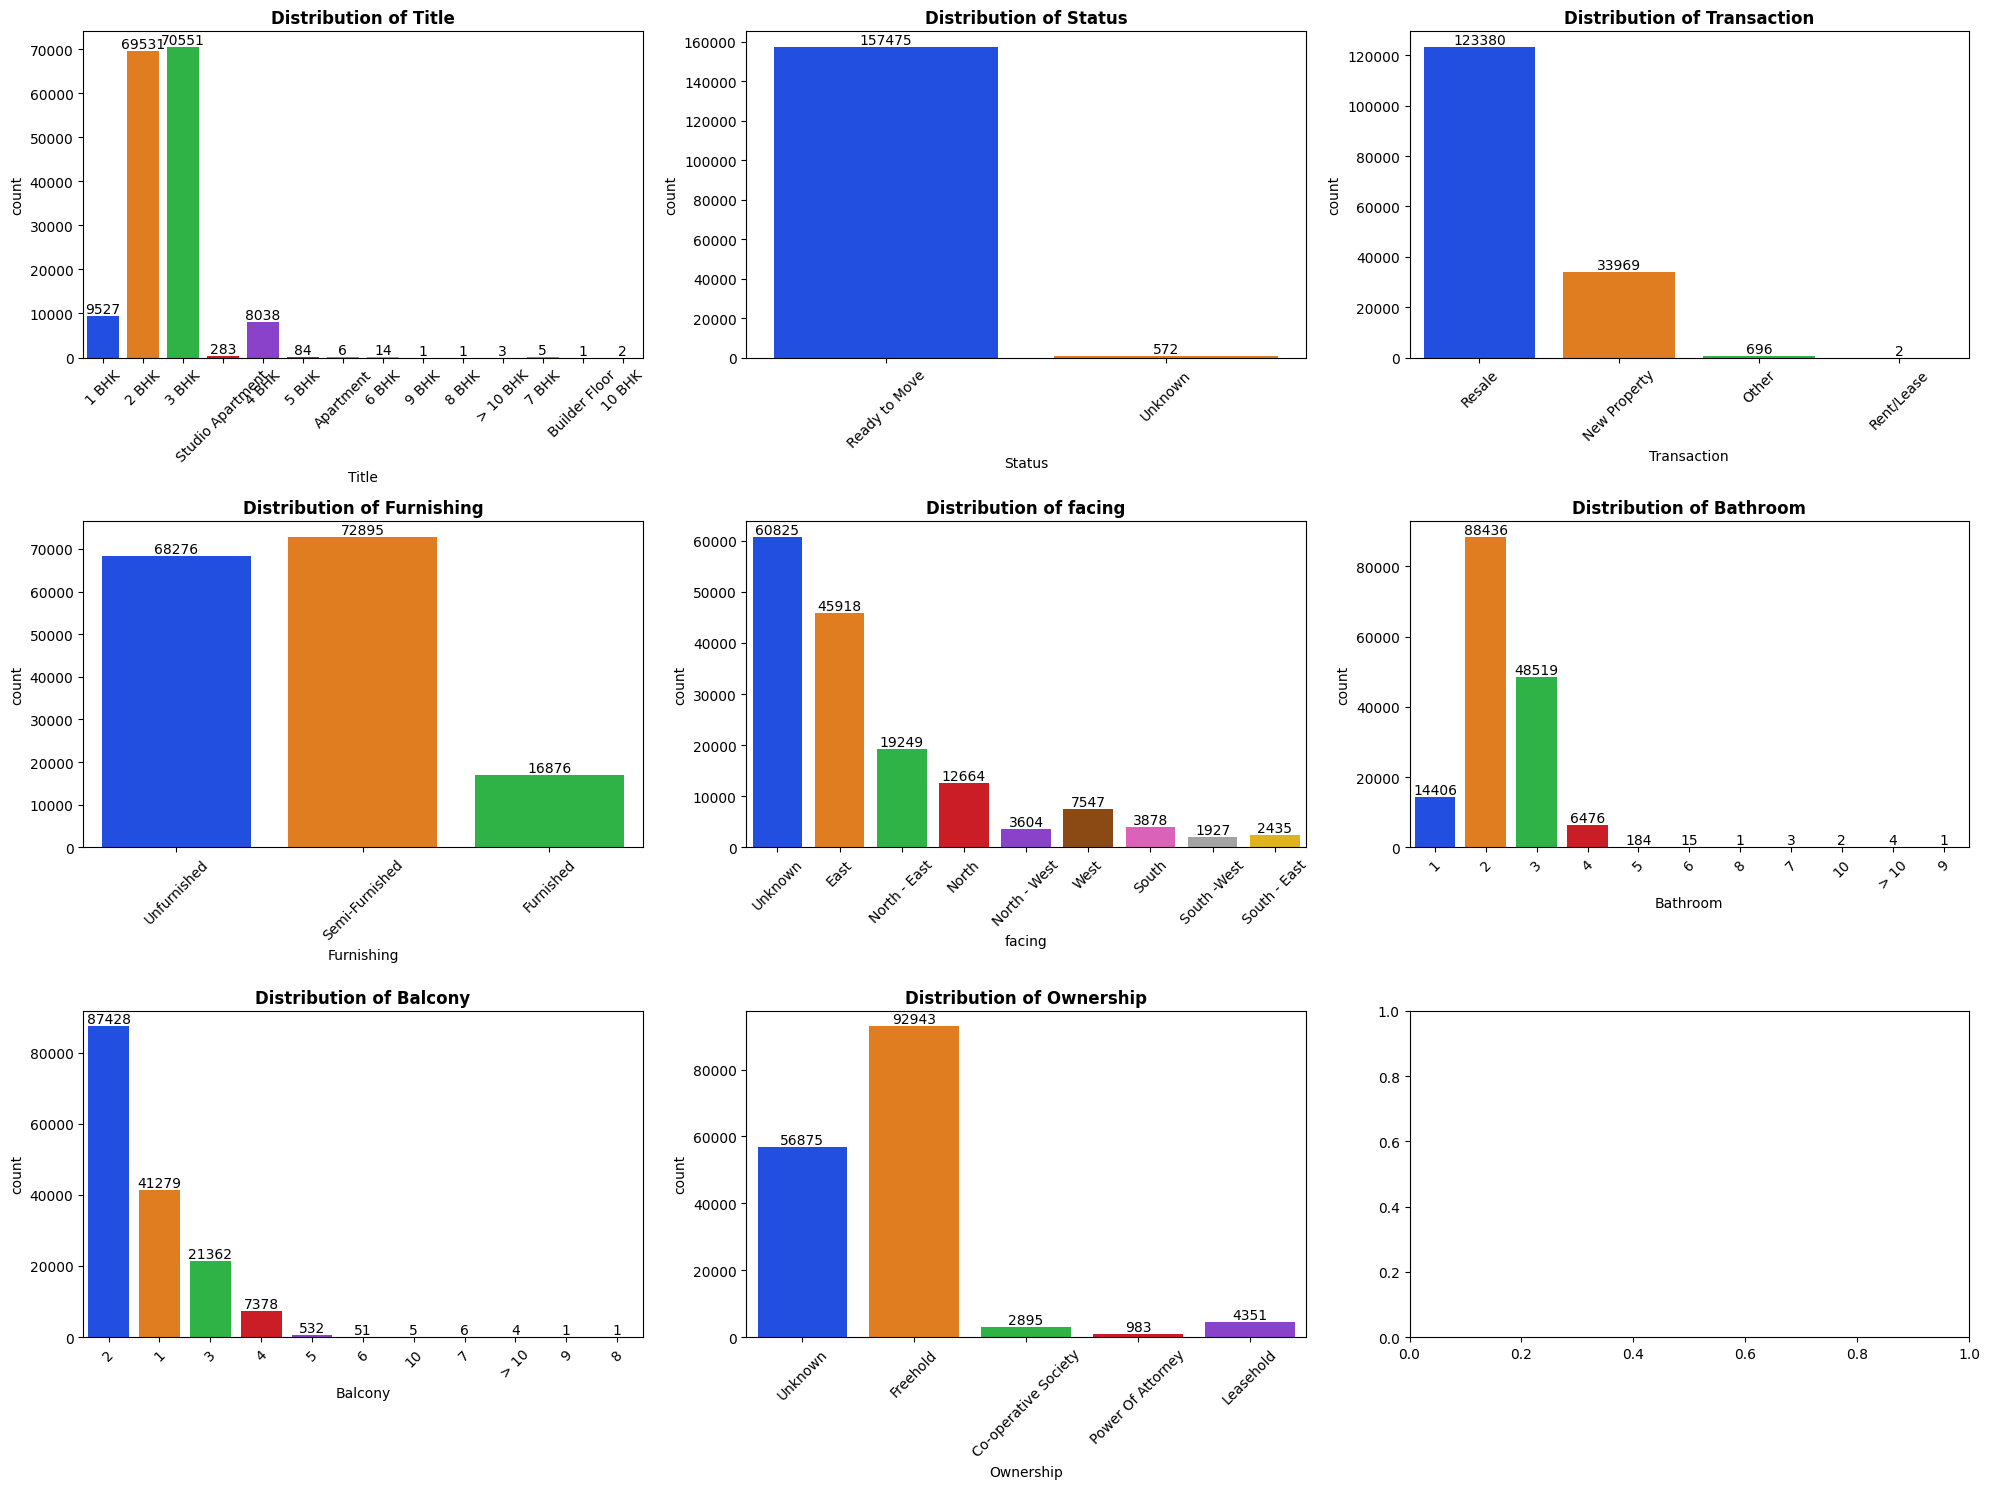

In [72]:
cat_cols_plot = df.drop(columns=['location', 'Floor', 'overlooking']).select_dtypes(include='O').columns.to_list()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
for col, subplot in zip(cat_cols_plot, axes.flatten()):
    sns.countplot(x=col, data=df, ax=subplot, hue=col, palette='bright').set_title(f'Distribution of {col}', fontweight='bold')
    for container in subplot.containers: subplot.bar_label(container)
    for label in subplot.get_xticklabels(): label.set_rotation(45)
plt.tight_layout()
plt.show()

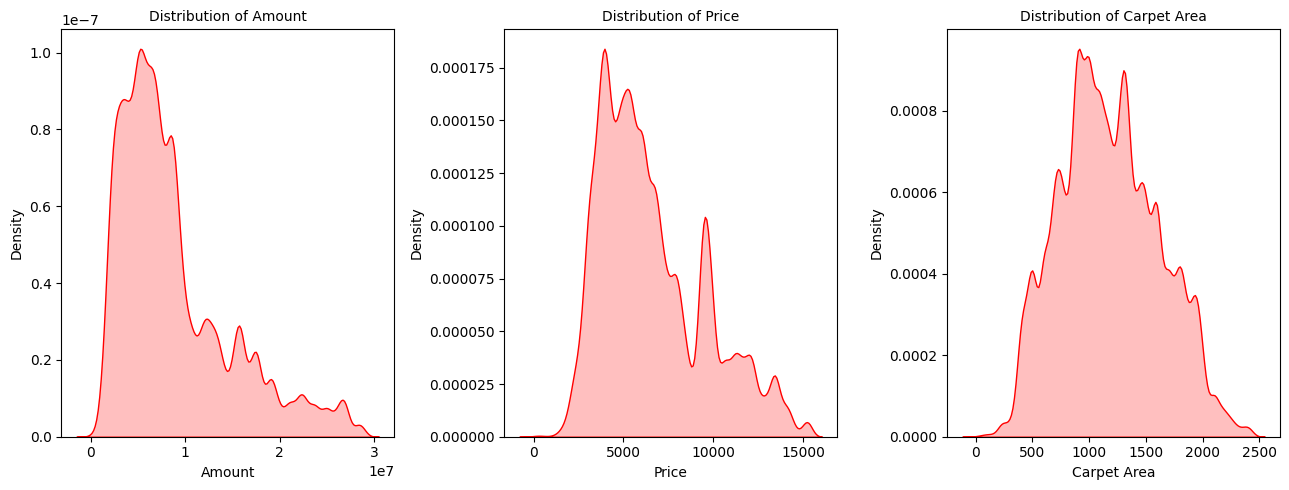

In [73]:
fig, axes = plt.subplots(ncols=3, figsize=(13,5))
for index, col in enumerate(numerical_cols):
    sns.kdeplot(data= df, x=col, color='red', ax=axes[index], fill=True).set_title('Distribution of '+col, fontsize=10)
plt.tight_layout()
plt.show()

In [74]:
df.columns

Index(['Index', 'Title', 'Amount', 'Price', 'location', 'Carpet Area',
       'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking',
       'Bathroom', 'Balcony', 'Ownership'],
      dtype='object')

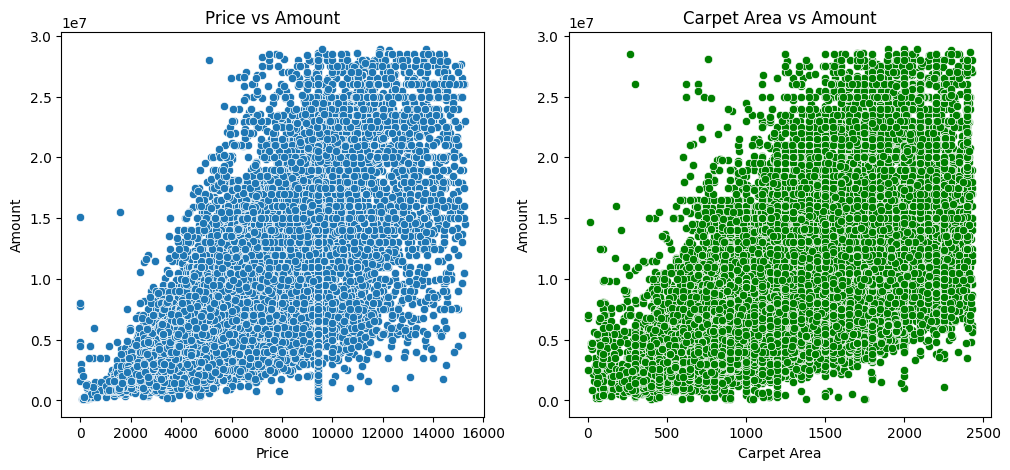

In [75]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Price', y='Amount', data=df)
plt.title('Price vs Amount')

plt.subplot(1,2,2)
sns.scatterplot(x='Carpet Area', y='Amount', data=df, color='green')
plt.title('Carpet Area vs Amount')
plt.show()

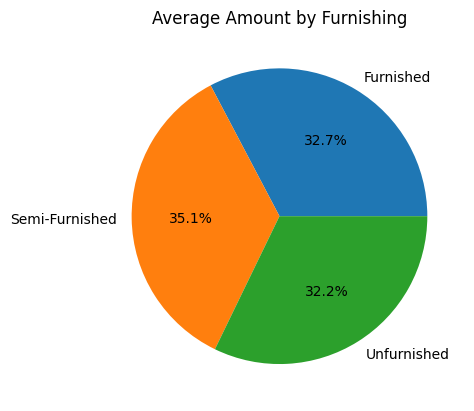

In [76]:
df.groupby('Furnishing')['Amount'].mean().plot.pie(autopct='%1.1f%%', title='Average Amount by Furnishing')
plt.ylabel('')  # Remove the y-label
plt.show()

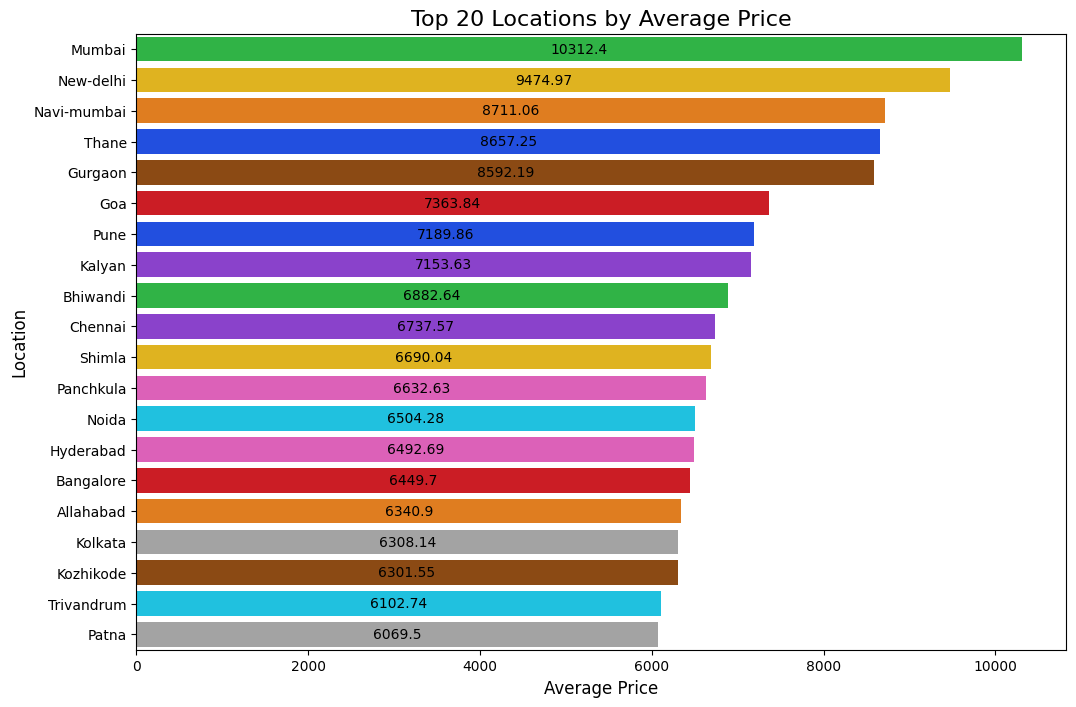

In [77]:
top_20_locations = df.groupby('location')['Price'].mean().sort_values(ascending=False).head(20).index
top_20_data = df[df['location'].isin(top_20_locations)]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Price', y='location', data=top_20_data, order=top_20_locations, hue='location', palette='bright', errorbar=None)
for container in ax.containers: ax.bar_label(container, label_type='center', fontsize=10, color='black')

plt.title('Top 20 Locations by Average Price', fontsize=16)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.show()

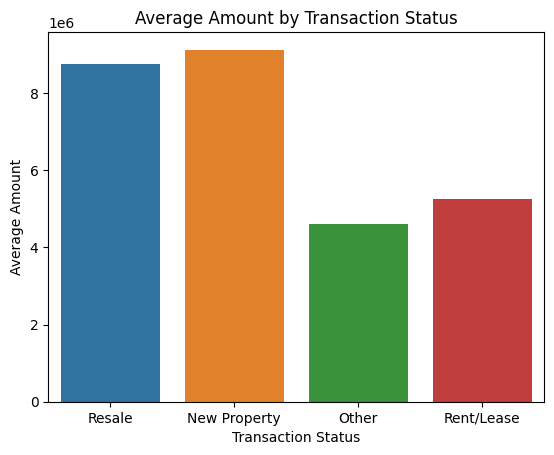

In [78]:
sns.barplot(x='Transaction', y='Amount', data=df, hue='Transaction', errorbar=None)
plt.title('Average Amount by Transaction Status')
plt.xlabel('Transaction Status')
plt.ylabel('Average Amount')
plt.show()

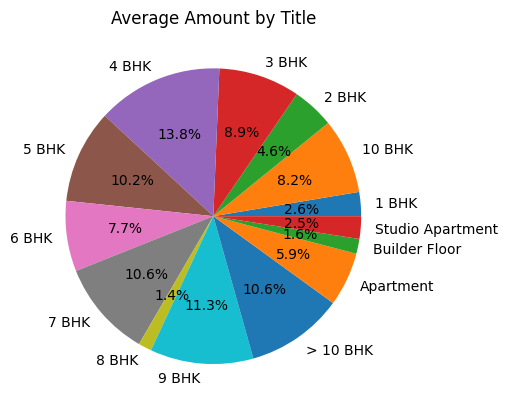

In [79]:
df.groupby('Title')['Amount'].mean().plot.pie(autopct='%1.1f%%', title='Average Amount by Title')
plt.ylabel('')
plt.show()

# **LABEL ENCODING**

In [80]:
categorical_cols =  df.select_dtypes(include='O').columns.to_list()
print(categorical_cols)

['Title', 'location', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership']


In [81]:
df['Bathroom'].unique()

array(['1', '2', '3', '4', '5', '6', '8', '7', '10', '> 10', '9'],
      dtype=object)

In [82]:
df['Balcony'].unique()

array(['2', '1', '3', '4', '5', '6', '10', '7', '> 10', '9', '8'],
      dtype=object)

In [83]:
df['Bathroom'] = df['Bathroom'].replace({'> 10': 11})
df['Balcony'] = df['Balcony'].replace({'> 10': 11})

df['Bathroom'] = df['Bathroom'].astype(int)
df['Balcony'] = df['Balcony'].astype(int)

In [84]:
df['Title'].unique()

array(['1 BHK', '2 BHK', '3 BHK', 'Studio Apartment', '4 BHK', '5 BHK',
       'Apartment', '6 BHK', '9 BHK', '8 BHK', '> 10 BHK', '7 BHK',
       'Builder Floor', '10 BHK'], dtype=object)

In [85]:
df['Title'] = df['Title'].replace({
        ' BHK': '',
        'Studio Apartment': 0,
        '> 10': 11,
        'Apartment': 12,
        'Builder Floor': 13}, regex=True)

df['Title'] = df['Title'].astype(int)
df['Title'].unique()

array([ 1,  2,  3,  0,  4,  5, 12,  6,  9,  8, 11,  7, 13, 10])

In [86]:
df['Floor'].nunique()

746

In [87]:
floor = df['Floor'].str.split(' out of ', expand=True)[0]
floor.head()

,0
0,10
1,3
3,1
5,2
6,4


In [88]:
floor.unique()

array(['10', '3', '1', '2', '4', 'Ground', '6', '16', '5', '20', '15',
       '27', '11', '8', '9', '14', '12', '7', '21', 'Upper Basement',
       '13', '17', '28', '30', '23', '19', '24', '18', '22', '25', '32',
       '26', '33', 'Lower Basement', '31', '29', '35', '38', '34', '200'],
      dtype=object)

In [89]:
df['Floor'] = floor.replace({'Ground': 0, 'Upper Basement': -1, 'Lower Basement': -2})
df['Floor'] = df['Floor'].astype(int)
df['Floor'].unique()

array([ 10,   3,   1,   2,   4,   0,   6,  16,   5,  20,  15,  27,  11,
         8,   9,  14,  12,   7,  21,  -1,  13,  17,  28,  30,  23,  19,
        24,  18,  22,  25,  32,  26,  33,  -2,  31,  29,  35,  38,  34,
       200])

In [90]:
categorical_cols =  df.select_dtypes(include='O').columns.to_list()
print(categorical_cols)

['location', 'Status', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership']


In [91]:
df['Furnishing'].tail()

,Furnishing
187528,Semi-Furnished
187529,Unfurnished
187530,Furnished
187531,Semi-Furnished
187532,Semi-Furnished


In [92]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Apply label encoding to the categorical column 'Furnishing'
furnishing_encoded = le.fit_transform(df['Furnishing'])
furnishing_encoded[-5:]

array([1, 2, 0, 1, 1])

In [93]:
le.classes_

array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)

In [94]:
list(enumerate(le.classes_))

[(0, 'Furnished'), (1, 'Semi-Furnished'), (2, 'Unfurnished')]

In [95]:
le.transform(['Unfurnished', 'Furnished'])

array([2, 0])

In [96]:
# from sklearn.preprocessing import LabelEncoder

# # Apply label encoding to each categorical column
# for col in categorical_cols:
#     encoder = LabelEncoder()
#     df[col] = encoder.fit_transform(df[col])

In [97]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

In [98]:
df[categorical_cols].head()

,location,Status,Transaction,Furnishing,facing,overlooking,Ownership
0,67,0,3,2,7,18,4
1,67,0,3,1,0,0,1
3,67,0,3,2,7,18,4
5,67,0,3,2,0,1,0
6,67,0,3,2,7,18,4


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158047 entries, 0 to 187532
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Index        158047 non-null  int64  
 1   Title        158047 non-null  int64  
 2   Amount       158047 non-null  float64
 3   Price        158047 non-null  float64
 4   location     158047 non-null  int64  
 5   Carpet Area  158047 non-null  float64
 6   Status       158047 non-null  int64  
 7   Floor        158047 non-null  int64  
 8   Transaction  158047 non-null  int64  
 9   Furnishing   158047 non-null  int64  
 10  facing       158047 non-null  int64  
 11  overlooking  158047 non-null  int64  
 12  Bathroom     158047 non-null  int64  
 13  Balcony      158047 non-null  int64  
 14  Ownership    158047 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 19.3 MB


# **FEATURE SCALING**

In [100]:
df.head()

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,1,4200000.0,6000.00,67,500.0,0,10,3,2,7,18,1,2,4
1,1,2,9800000.0,13799.00,67,473.0,0,3,3,1,0,0,2,2,1
3,3,1,2500000.0,9450.75,67,530.0,0,1,3,2,7,18,1,1,4
5,5,1,4500000.0,6618.00,67,680.0,0,2,3,2,0,1,1,1,0
6,6,1,1650000.0,2538.00,67,550.0,0,4,3,2,7,18,1,2,4


In [101]:
numerical_cols

['Amount', 'Price', 'Carpet Area']

In [102]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Standardization - Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,1,-0.769992,-0.190566,67,-1.557639,0,10,3,2,7,18,1,2,4
1,1,2,0.164681,2.480944,67,-1.619806,0,3,3,1,0,0,2,2,1
3,3,1,-1.053732,0.991472,67,-1.488566,0,1,3,2,7,18,1,1,4
5,5,1,-0.719920,0.021127,67,-1.143199,0,2,3,2,0,1,1,1,0
6,6,1,-1.195602,-1.376458,67,-1.442517,0,4,3,2,7,18,1,2,4


In [103]:
df[numerical_cols] = df[numerical_cols].round(3)
df.head()

,Index,Title,Amount,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,1,-0.770,-0.191,67,-1.558,0,10,3,2,7,18,1,2,4
1,1,2,0.165,2.481,67,-1.620,0,3,3,1,0,0,2,2,1
3,3,1,-1.054,0.991,67,-1.489,0,1,3,2,7,18,1,1,4
5,5,1,-0.720,0.021,67,-1.143,0,2,3,2,0,1,1,1,0
6,6,1,-1.196,-1.376,67,-1.443,0,4,3,2,7,18,1,2,4


# **FEATURE SELECTION**

In [104]:
X = df.drop(columns=['Index', 'Amount'], axis=1)  # Features - Independent variables
y = df['Amount']  # Target - Dependent variable

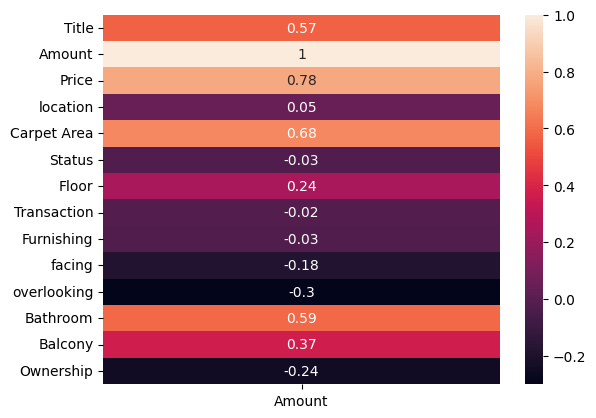

In [105]:
# Correlation of Features with 'Amount'
amount_corr = df.drop(columns='Index').corr()['Amount']
sns.heatmap(amount_corr.to_frame().round(2), annot=True)
plt.show()

#### **Features Moderately to Strongly Correlated with Amount**

1. **Price**: 0.78 – Strong positive correlation.
2. **Carpet Area**: 0.68 – Moderate positive correlation.
3. **Bathroom**: 0.59 – Moderate positive correlation.
4. **Title**: 0.57 – Moderate positive correlation.
5. **Balcony**: 0.37 – Weak to moderate positive correlation.

Other features show weaker correlations with `Amount`.

In [106]:
X.columns

Index(['Title', 'Price', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Bathroom',
       'Balcony', 'Ownership'],
      dtype='object')

In [107]:
len(X.columns)

13

In [108]:
from sklearn.feature_selection import SelectKBest, f_classif

# Instantiate SelectKBest
n = 5  # Top 5 features to select
selector = SelectKBest(score_func=f_classif, k=n)
X_new = selector.fit_transform(X, y)    # Fit the selector to the data
scores = selector.scores_   # Get the scores for each feature

# Display feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores}).sort_values(by='Score', ascending=False)
feature_scores.reset_index(drop=True)

,Feature,Score
0,Price,353.106191
1,Carpet Area,255.790131
2,Bathroom,192.816352
3,Title,168.432695
4,Balcony,87.249636
5,overlooking,79.814195
6,Transaction,72.452254
7,Ownership,62.348407
8,facing,55.533356
9,Floor,49.560655


In [109]:
selected_features = X.columns[selector.get_support()]
X_selected = pd.DataFrame(X_new, columns=selected_features)
X_selected.columns

Index(['Title', 'Price', 'Carpet Area', 'Bathroom', 'Balcony'], dtype='object')

# **DATA SPLITTING**

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=123)

# **MODEL BUILDING**

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Dictionary of regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'XGBoost Regressor': XGBRegressor()
}

In [112]:
from sklearn.metrics import r2_score, mean_absolute_error
from tqdm import tqdm

# Initialize a dictionary to store the results
results = {}

# Iterate through the regression models
for name, model in tqdm(regression_models.items(), desc="Training Models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate R² score and Mean Absolute Error
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # Store the results
    results[name] = {'R²': r2, 'MAE': mae}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

Training Models: 100%|██████████| 5/5 [00:21<00:00,  4.25s/it]


,R²,MAE
Linear Regression,0.869791,0.255494
Decision Tree Regressor,0.967073,0.053280
Random Forest Regressor,0.978954,0.046313
K-Neighbors Regressor,0.973311,0.053732
XGBoost Regressor,0.979162,0.056290


The **Random Forest Regressor** seems to the best model based on the evaluation metrics. This model achieves the optimal balance between predictive accuracy (R²) and minimal error (MAE), making it the most suitable for our dataset.